In [68]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import keras
import numpy as np
import random
import cv2
def show(a):
    a = a.reshape(28, 28)
    plt.imshow(a, cmap=matplotlib.cm.binary, interpolation='nearest')
    return plt.axis('off')


In [69]:
# data = pd.read_csv('small.csv')
data = pd.read_csv('TMNIST_Data.csv')

x = data.drop(columns= {'names', 'labels'})
y =  data[['labels']]
size = int(data.shape[0]*0.8)
x = x.to_numpy()
y = y.to_numpy()
x = x/255
# x[]
# x = x*2

# box = x
# box -= box*(box<=50)
# box += (255-box)*(box>50)
# x= box

x_train = x[:size]
y_train = y[:size]
x_test = x[size:]
y_test = y[size:]
x_train = x
y_train = y
x_test = x
y_test = y

# x_train[0].shape
# type(x_train)
# x.shape

In [70]:
model = keras.Sequential([keras.layers.Dense(100,input_shape = (x_train[0].shape), activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20)
model.evaluate(x_test, y_test)
t=model.predict(x_test)
p=0


Epoch 1/20
270/270 [==============================] - 1s 2ms/step - loss: 1.0284 - accuracy: 0.8075
Epoch 2/20
270/270 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.9215
Epoch 3/20
270/270 [==============================] - 0s 2ms/step - loss: 0.2745 - accuracy: 0.9342
Epoch 4/20
270/270 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.9427
Epoch 5/20
270/270 [==============================] - 0s 2ms/step - loss: 0.2089 - accuracy: 0.9482
Epoch 6/20
270/270 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.9538
Epoch 7/20
270/270 [==============================] - 0s 2ms/step - loss: 0.1771 - accuracy: 0.9563
Epoch 8/20
270/270 [==============================] - 0s 2ms/step - loss: 0.1655 - accuracy: 0.9592
Epoch 9/20
270/270 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.9607
Epoch 10/20
270/270 [==============================] - 0s 2ms/step - loss: 0.1484 - accuracy: 0.9637

(-0.5, 27.5, 27.5, -0.5)
0.9985784
0
Stylish-Regular


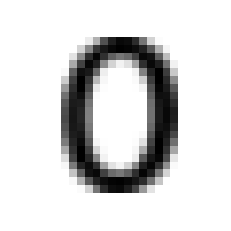

In [87]:


print(show(x_test[p]))
# print(x_test[p])
# print(t[p])
print(np.max(t[p]))
print(np.argmax(t[p]))
print(data['names'][p])
p+=1

In [72]:
model.save('saved.h5')
loaded_model = keras.models.load_model('saved.h5')
loaded_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
loaded_model.evaluate(x_test,y_test)


270/270 [==============================] - 0s 1ms/step - loss: 0.1003 - accuracy: 0.9756


[0.10027264803647995, 0.9755560755729675]